# 인공신경망 (Artificial Neural Network)

## 생물학적 신경세포 : 뉴런 (Neuron)

![Neuron](http://blogimg.hani.co.kr/editor/uploads/2009/06/11/33868_97348.jpg)

- 수상돌기 (Dendrite) : 인접 뉴런으로부터 신경흥분이 세포체로 입력되는 통로 (**Input**).
- 축색돌기 (Axon) : 가늘고 긴 신경섬유로 신경흥분을 전달하는 역할 (**Output**)
- 세포체 (Cell body) : 일정시간 동안 입력된 자극을 세포체 내에서 가중되고 그 값이 임계치 이상이 되면 뉴런이 활성화 하여 축색돌기로 자극이 전달됨.


## 논리유닛 (Logistic Unit)
생물학젹 신경세포를 모델링한 뉴런이라는 매우 단순한 기능을 하는 유닛 (각 유닛과 가중치 모두 변수화).
유닛을 상호 연결하여 네트워크를 구성할 경우 간단한 논리 연산이 가능

<img src="https://ds055uzetaobb.cloudfront.net/image_optimizer/e92a70e431275d0cdaf1d3c01686ea3739770f72.png" width=450, height=400, align="left">

- 입력값(Inputs): 변수에 저장하여 수치적으로 설정
- 가중치(Weights) (뉴런간의 연결 세기) : 2차원 배열로 처리 ($w_{ji}$ 여기에서 $i$ = 입력 유닛번호, $j$= 출력 유닛번호)
- 바이어스: 신경세포가 가지는 일종의 편견을 바이어스로 구현 (바이어스는 1, 가중치 변경으로 구현)
- 세포체의 기능(Sum): 연산자를 통해 구현
    $$\sum_{i=0}^n w_{i} x_i + b = w_{0} x_0 +  w_{1} x_1 + \dots + w_{n} x_n  + b$$
- 활성화(Activation) : 활성화 함수 구현(시그모이드 함수)
$$f(x) = {1 \over {1 + e^{-x}}}$$

<img src="http://cs231n.github.io/assets/nn1/neuron_model.jpeg", height=500, width=450, align="left">

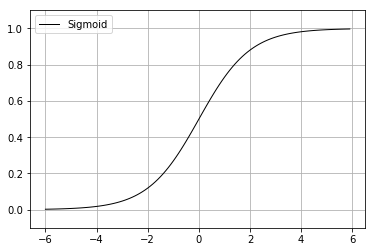

In [7]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-6.0, 6.0, 0.1)
y_sigmoid = sigmoid(x)
plt.plot(x, y_sigmoid, label='Sigmoid', color='k', lw=1, linestyle=None)
plt.ylim(-0.1, 1.1)
plt.grid()
plt.legend()
plt.show()

## AND, OR, NOT 구현
바이어스 입력($x_0$)을 포함하여 입력이 3 또는 2 개, 출력이 1개인 구조, 연결 가중치 설정이 중요
<img src="https://schwalbe10.github.io/thinkage/images/posts/perceptron.png" width="300" height="200">
### AND
<img src="http://jun.hansung.ac.kr/PR/images/and.png" align=left width="300">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png" width=200 height=400 align="right">


$X_1$ | $X_2$ | g( 30 + 20 $X_1$ + 20 $X_2$ )
----- | ----- | -----------------------------
 0 | 0 | g(-30) $\sim 0 $
 0 | 1 | g(-10) $\sim 0 $
 1 | 0 | g(-10) $\sim 0 $
 1 | 1 | g(10) $\sim 1 $
 
### OR
<img src="http://jun.hansung.ac.kr/PR/images/or.png" align=left width="300">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png" width=200 height=400 align="right">

$X_1$ | $X_2$ |g(-10 + 20$X_1$ + 20$X_2$)
----- | ----- | --------------------
 0 | 0 | g(-10) $\sim 0$
 0 | 1 | g(10)  $\sim 1$ 
 1 | 0 | g(10)  $\sim 1$ 
 1 | 1 | g(30)  $\sim 1$ 
 
### NOT
<img src="http://jun.hansung.ac.kr/PR/images/not.png" align=left width="300">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png" width=200 height=400 align="right">

$X_1$ | g(10 - 20 $X_1$)
----- | --------------------
 0 | g(10) $\sim 1$
 1 | g(-10) $\sim 0$  

- AND, OR, NOT 게이트는 선형 분리 가능한 결정 경계를 가짐, 하지만 결정 경계가 2개 필요한 XOR 구현은 1개 층으로는 불가능
</span>
<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/Logic-Gates.png?x64257" width="500" height="150" >

### XNOR 구현 : 2개층 구조로 구현가능
<img src="http://jun.hansung.ac.kr/PR/images/and-color.png" align=left width="220">
<img src="http://jun.hansung.ac.kr/PR/images/not-and-color.png" align=left width="220">
<img src="http://jun.hansung.ac.kr/PR/images/or-color.png" align=left width="220">

<img src="http://jun.hansung.ac.kr/PR/images/xnor-color.png" align=left width="300">

$x_1$ | $x_2$ | $a_1$ | $a_2$ | $y$ 
----- | ----- | ----- | ----- |----
0 | 0 | 0 | 1 | 1
0 | 1 | 0 | 0 | 0
1 | 0 | 0 | 0 | 0
1 | 1 | 1 | 0 | 1

### 신경망 층의 수와 결정 영역의 특성
<img src="http://jun.hansung.ac.kr/PR/images/multi-layer.png" width="500" > 
<img src="http://jun.hansung.ac.kr/PR/images/decision_boundary.png" width="600" > 

## 신경망 분류기 (Neural Network Classification)

<img src="http://jun.hansung.ac.kr/PR/images/multi-classification-layer.png" width="500" > 

#### 이진분류기 (Binary Classification) : 1 output ( y = 0 or 1)

#### 다중분류기 (multi-class Classification) : for K-classes, K output units

eg) for 4 classes $$ y_1 = \begin{bmatrix} 1 \\ 0 \\0 \\0 \end{bmatrix}, y_2 = \begin{bmatrix} 0 \\ 1 \\0 \\0 \end{bmatrix}, y_3 = \begin{bmatrix} 0 \\ 0 \\1 \\0 \end{bmatrix}, y_4 = \begin{bmatrix} 0 \\ 0 \\0 \\1 \end{bmatrix}$$



# 연결강도(Weights) 구하기

- 전체 학습 데이터에 대한 전체 오차를 최소화하는 방향으로 연결 강도(Weights)를 갱신
- 입력 $x$에 대한 목표 출력이 $y$인 경우, 연결강도에 따른 전체 오차 $J(W)$는 다음과 같이 정의
$$ J(W) = \text{error between target out  } y_k^{(i)} \text{ and computed output  } h(x^{(i)})_k$$
$$ J(W) = - { 1 \over m} \left[ \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log h(x^{(i)})_k + 
(1-y_k^{(i)} )  \log (1-h(x^{(i)})_k)  \right]$$
- 어떻게 오차가 최소가 되는 연결강도 $W$ 를 찾는가? ==> 경사강하법 (Gradient Descent Method)

### 경사강하법

<img src="https://cdn-images-1.medium.com/max/800/1*1eNyZxs_SthrBjvf-RQy7Q.png" align="right" width=450>
1. 최소 오차점을 찾기 위해서는 오차함수식 $J(W)$ 를 $W$에 관하여 편미분한 결과가 기울기의 크기를 의미함으로
$$ \min_W J(W) $$
2. 그 기울기만큼 $\Delta W$를 이전 연결 강도에서 빼주는 과정을 반복하면 최소점에 도달할 수 있음.
$$  W_{n+1} = W_n - \alpha {\partial J(W) \over \partial W} $$
3. 이러한 방식으로 최적값을 찾아가는 방법을 경사 강하법(gradient descent)이라고 함.

### 역전파(backpropagation) 알고리즘
- 경사하강범에서의 그라디언트 ${\partial J(W) \over \partial W}$ 는 역전파(backpropagation) 알고리즘으로 구한다.
- 역전파 알고리즘에서 학습은 전향(forward) 단계와 후향(backward) 단계로 이루어진다. 학습에서 중요한 것은 연결 강도의 갱신인데 역전파 알고리즘은 후향 단계에서 연결 강도의 갱신이 이루어진다.
- 전향 단계는 신경 회로망에 입력 패턴(x)을 제시하고, 각 노드에 대해서 입력 함수와 활성화 함수를 이용하여 출력을 산출하는 단계다. 이 때 입력 신호는 전방향, 즉 출력층 방향으로만 전달된다. 초기에 임의로 정한 연결 강도(W)로 인해 출력층에서 출력값과 목표값이 일치하지 않고 큰 오차가 발생하게 된다.
- 후향단계는 역전파 알고리즘으로 그 오차로부터 그라디언트를 구하고, 이를 이용한 적절한 연결강도의 갱신을 수행한다.

<img src="https://image.slidesharecdn.com/lect5-uwa-160515043258/95/artificial-neural-networks-lect5-multilayer-perceptron-backpropagation-13-638.jpg?cb=1463287701" >

## An example for a given one trainnig data (x,y) 
### 전향파 (forward propabation) 알고리즘
<img src="http://jun.hansung.ac.kr/PR/images/forward.png" width="350" align="right">
<br> 
\begin{eqnarray*}
a^{(1)} & = &x \\ 
z^{(2)} & = &W^{(1)}a^{(1)}  \text{ (add } a_0^{(2)} )\\
a^{(2)} & = &g( z^{(2)} ) \\
z^{(3)} & = &W^{(2)}a^{(2)}  \text{ (add } a_0^{(3)} )\\
a^{(3)} & = &g( z^{(3)} )\\ 
z^{(4)} & = &W^{(3)}a^{(3)} \\
a^{(4)} & = &g( z^{(4)} ) = h(x) \\
\end{eqnarray*}

### 역전파 (backward propabation) 알고리즘

\begin{eqnarray*}
\delta^{(4)} & = & a^{(4)} - y_j \\ 
\delta^{(3)} & = & (W^{(3)})^T \delta^{(4)} .* (a^{(3)} .* (1-a^{(3} ))\\ 
\delta^{(2)} & = & (W^{(2)})^T \delta^{(3)} .* (a^{(2)} .* (1-a^{(2} ))\\ 
\end{eqnarray*}
<br>
<img src="http://jun.hansung.ac.kr/PR/images/backward.png" width="350">
<br>
$$ {\partial J(W) \over \partial w_{ij}^{(l)}  }= a_j^{(l)}\delta_i^{(l+1)} $$
$$ W_{ij}^{(l)} =  W_{ij}^{(l)} - \alpha {\partial J(W) \over \partial w_{ij}^{(l)} } $$

--- Labels of sample train data ---
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]
(15, 784)
(15, 28, 28)


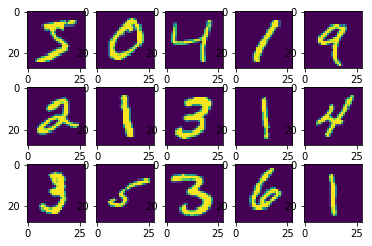

In [83]:
%matplotlib inline
import urllib.request
import gzip
import pickle
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done")

def _change_ont_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """
    Parameters
    ----------
    normalize : Normalize the pixel values
    flatten : Flatten the images as one array
    one_hot_label : Encode the labels as a one-hot array
    Returns
    -------
    (Trainig Image, Training Label), (Test Image, Test Label)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    if one_hot_label:
        dataset['train_label'] = _change_ont_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_ont_hot_label(dataset['test_label'])

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()


# Load the MNIST dataset
url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath('~'))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, flatten=True)
no_row = 3
no_col = 5
# Show the sample image
img = x_train[0:no_row*no_col]
label = t_train[0:no_row*no_col]
print("--- Labels of sample train data ---")
print(label)

print(img.shape)
img = img.reshape(no_row*no_col, 28, 28)
print(img.shape)

#img_show(img)
a = plt.figure()
for i in range(no_row*no_col):
    plt.subplot(no_row, no_col, i+1)
    imgplot = plt.imshow(img[i])

    

<img src="https://schwalbe10.github.io/thinkage/images/posts/neural-network.png" width="500">

- No. of input node = 784
- No. of layer-2 node = 50
- No. of layer-3 node = 100
- No. of output node = 10
- W1 : [784, 50]
- W2 : [50, 100]
- W3 : [100, 10]

W1 : (784, 50)
W2 : (50, 100)
W3 : (100, 10)
b1 : (50,)
b2 : (100,)
b3 : (10,)
Accuracy:0.9352
--- Labels of sample test data (actual) ---
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1]
--- Labels of sample test data (predicted) ---
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1]


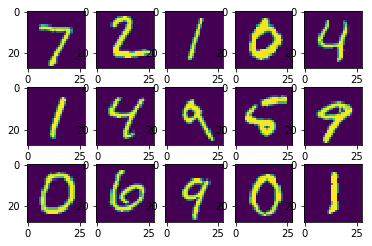

In [115]:
import os
import numpy as np
import pickle
from mnist import load_mnist

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    l = sigmoid(np.dot(x, W1) + b1)
    m = sigmoid(np.dot(l, W2) + b2)
    y = softmax(np.dot(m, W3) + b3)

    return y

no_row = 3
no_col = 5
label_p = []

x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
    if i < no_row*no_col:
        label_p.append(p)
        
print("W1 : " + str(network['W1'].shape))
print("W2 : " + str(network['W2'].shape))
print("W3 : " + str(network['W3'].shape))
print("b1 : " + str(network['b1'].shape))
print("b2 : " + str(network['b2'].shape))
print("b3 : " + str(network['b3'].shape))
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


# Show the sample image
img = x[0:no_row*no_col]
label = t[0:no_row*no_col]
print("--- Labels of sample test data (actual) ---")
print(label)
print("--- Labels of sample test data (predicted) ---")
print(label_p)

img = img.reshape(no_row*no_col, 28, 28)

#img_show(img)
a = plt.figure()
for i in range(no_row*no_col):
    plt.subplot(no_row, no_col, i+1)
    imgplot = plt.imshow(img[i])